In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split,learning_curve
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
data=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
data

,indx,kmer,mean_1,mean_2,mean_3,mean_4,mean_5,std_1,std_2,std_3,...,mdintense_2,mdintense_3,mdintense_4,mdintense_5,L-1,L-2,L-3,L-4,L-5,label
0,260,AGTTC,0.513199,0.397293,-0.850444,-0.837177,-0.786233,0.047088,0.272815,0.031234,...,0.471305,-0.846254,-0.839970,-0.768751,6,81,6,15,104,1
1,259,AGTTC,0.589209,0.568374,-0.717482,-0.762448,-0.789418,0.062266,0.080098,0.038712,...,0.579342,-0.727349,-0.763294,-0.799239,6,32,6,15,90,1
2,243,AGTTC,0.458838,0.109656,-0.797939,-0.820008,-0.756034,0.149853,0.419986,0.034345,...,0.190347,-0.796560,-0.817250,-0.755180,13,6,6,33,63,1
3,260,AGTTC,0.457595,0.472804,-0.688376,-0.681815,-0.679743,0.060894,0.174125,0.025067,...,0.513802,-0.686393,-0.686393,-0.696311,6,78,6,13,108,1
4,260,AGTTC,0.528384,0.423719,-0.713185,-0.825872,-0.800544,0.029393,0.277885,0.162593,...,0.522379,-0.768558,-0.826600,-0.792575,6,51,6,11,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,260,AGTTC,0.787659,0.405793,-0.611869,-0.739305,-0.605124,0.169036,0.279195,0.138040,...,0.463995,-0.667700,-0.744655,-0.604325,32,14,6,11,17,0
2629,161,AGTTC,0.396310,0.499622,-0.619268,-0.546544,-0.762006,0.090910,0.031997,0.130815,...,0.500937,-0.642935,-0.607435,-0.786905,39,6,6,16,16,0
2630,240,AGTTC,0.589990,0.614284,-0.632994,-0.789089,-0.753708,0.172348,0.280588,0.188418,...,0.688070,-0.685807,-0.796713,-0.751445,6,40,6,19,6,0
2631,260,AGTTC,0.661435,0.551367,-0.694797,-0.734620,-0.571503,0.110638,0.231089,0.049018,...,0.548295,-0.676666,-0.739763,-0.576580,33,34,6,11,6,0


In [14]:
X=data[['mean_1','mean_2','mean_3','mean_4','mean_5','std_1','std_2','std_3','std_4','std_5',
       'mdintense_1','mdintense_2','mdintense_3','mdintense_4','mdintense_5','L-1','L-2','L-3','L-4','L-5']]  # Features
y=data['label']  # Labels

X_train,X_test,y_train,y_test = train_test_split(X, y,train_size = 0.8,test_size = 0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
###LR
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

###RF
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


### SVM
svc = SVC(probability=True)
svc.fit(X_train,y_train)

###Xgboost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

###knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

AUC of LR:0.9359877848249941
AUC of RF:0.9505324563464099
AUC of SVM:0.9711651397697909
AUC of xgboost:0.9494753738939786


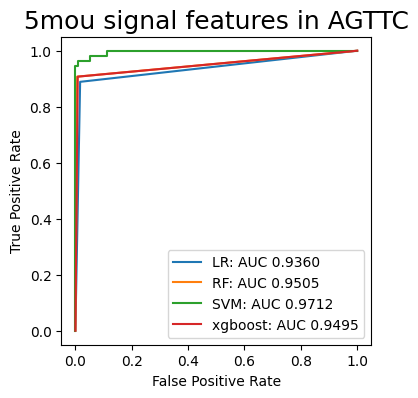

<Figure size 640x480 with 0 Axes>

In [27]:
### visualization
plt.figure(figsize = (4,4))

#for LR
fpr,tpr,thresh = roc_curve(y_test, logreg.predict(X_test))
auc = roc_auc_score(y_test, logreg.predict(X_test))
print("AUC of LR:"+str(auc))
plt.plot(fpr,tpr,label='LR: AUC %0.4f' % auc, lw = 1.5)

#for RF
fpr,tpr,thresh = roc_curve(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
print("AUC of RF:"+str(auc))
plt.plot(fpr,tpr,label='RF: AUC %0.4f' % auc, lw = 1.5)


#for svm
fpr,tpr,thresh = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, svc.predict(X_test))
print("AUC of SVM:"+str(auc))
plt.plot(fpr,tpr,label='SVM: AUC %0.4f' % auc, lw = 1.5)

#for xgboost
fpr,tpr,thresh = roc_curve(y_test, xgboost.predict(X_test))
auc = roc_auc_score(y_test, xgboost.predict(X_test))
print("AUC of xgboost:"+str(auc))
plt.plot(fpr,tpr,label='xgboost: AUC %0.4f' % auc, lw = 1.5)

#for knn
#fpr,tpr,thresh=roc_curve(y_test,knn.predict(X_test))
#auc = roc_auc_score(y_test, knn.predict(X_test))
#print("AUC of knn:"+str(auc))
#plt.plot(fpr,tpr,label='knn: AUC %0.4f' % auc, lw = 1.5)





plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5mou signal features in AGTTC', size = 18)
plt.legend(loc="lower right")
plt.show()
plt.savefig('/home/jiayi/5moU/Results/all_signal_ml_roc.png')

AUPRC of LR:0.8787084726363663
AUPRC of RF:0.9296013828746277
AUPRC of SVM:0.9834752676652986
AUPRC of xgboost:0.9207116876641778


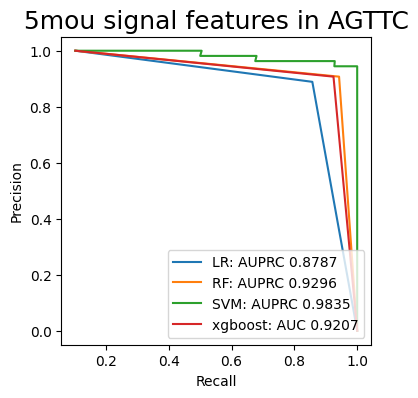

In [29]:
#precision, recall, thresholds = precision_recall_curve(y_test, y_score)
### visualization
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
plt.figure(figsize = (4,4))


precision, recall, thresholds = precision_recall_curve(y_test,logreg.predict(X_test))
#AUPRC = roc_prc_score(y_test, logreg.predict(X_test))
AUPRC_LR=auc(recall,precision)
print("AUPRC of LR:"+str(AUPRC_LR))
plt.plot(precision,recall,label='LR: AUPRC %0.4f' % AUPRC_LR, lw = 1.5)

#for RF
precision, recall, thresholds = precision_recall_curve(y_test,clf.predict(X_test))
AUPRC_RF=auc(recall,precision)
print("AUPRC of RF:"+str(AUPRC_RF))
plt.plot(precision,recall,label='RF: AUPRC %0.4f' % AUPRC_RF, lw = 1.5)



#for svm
precision, recall, thresholds = precision_recall_curve(y_test,svc.predict_proba(X_test)[:,1])
AUPRC_SVM=auc(recall,precision)
print("AUPRC of SVM:"+str(AUPRC_SVM))
plt.plot(precision,recall,label='SVM: AUPRC %0.4f' % AUPRC_SVM, lw = 1.5)


#for xgboost
precision, recall, thresholds = precision_recall_curve(y_test,xgboost.predict(X_test))
AUPRC_XGB=auc(recall,precision)
print("AUPRC of xgboost:"+str(AUPRC_XGB))
plt.plot(precision,recall,label='xgboost: AUC %0.4f' % AUPRC_XGB, lw = 1.5)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('5mou signal features in AGTTC', size = 18)
plt.legend(loc="lower right")
plt.show()
#plt.savefig('/home/jiayi/5moU/Results/all_signal_ml_roc.png')